# Fake News Detection

### impoting required libraby

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re
import warnings
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
warnings.simplefilter("ignore")

### Create objects

In [93]:
ps=PorterStemmer()
vec=TfidfVectorizer()
lc=LabelEncoder()
tfidf=TfidfVectorizer()

### Read dateset

In [94]:
dataset=pd.read_csv("C:/Users/reddy/OneDrive/Desktop/pantech/fake news.csv")

In [95]:
dataset

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True
...,...,...
10235,There are a larger number of shark attacks in ...,True
10236,Democrats have now become the party of the [At...,True
10237,Says an alternative to Social Security that op...,True
10238,On lifting the U.S. Cuban embargo and allowing...,False


### LabelEncodeing

In [96]:
dataset['Label']=lc.fit_transform(dataset['Label'])

In [97]:
dataset

,Statement,Label
0,Says the Annies List political group supports ...,0
1,When did the decline of coal start? It started...,1
2,"Hillary Clinton agrees with John McCain ""by vo...",1
3,Health care reform legislation is likely to ma...,0
4,The economic turnaround started at the end of ...,1
...,...,...
10235,There are a larger number of shark attacks in ...,1
10236,Democrats have now become the party of the [At...,1
10237,Says an alternative to Social Security that op...,1
10238,On lifting the U.S. Cuban embargo and allowing...,0


### Importing Stopwords from nltk

In [98]:
from nltk.corpus import stopwords

In [99]:
sw=stopwords.words("english")

### Checking null values

In [100]:
dataset.isnull().sum()

Statement    0
Label        0
dtype: int64

In [101]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 160.1+ KB


### Visualization

<AxesSubplot:>

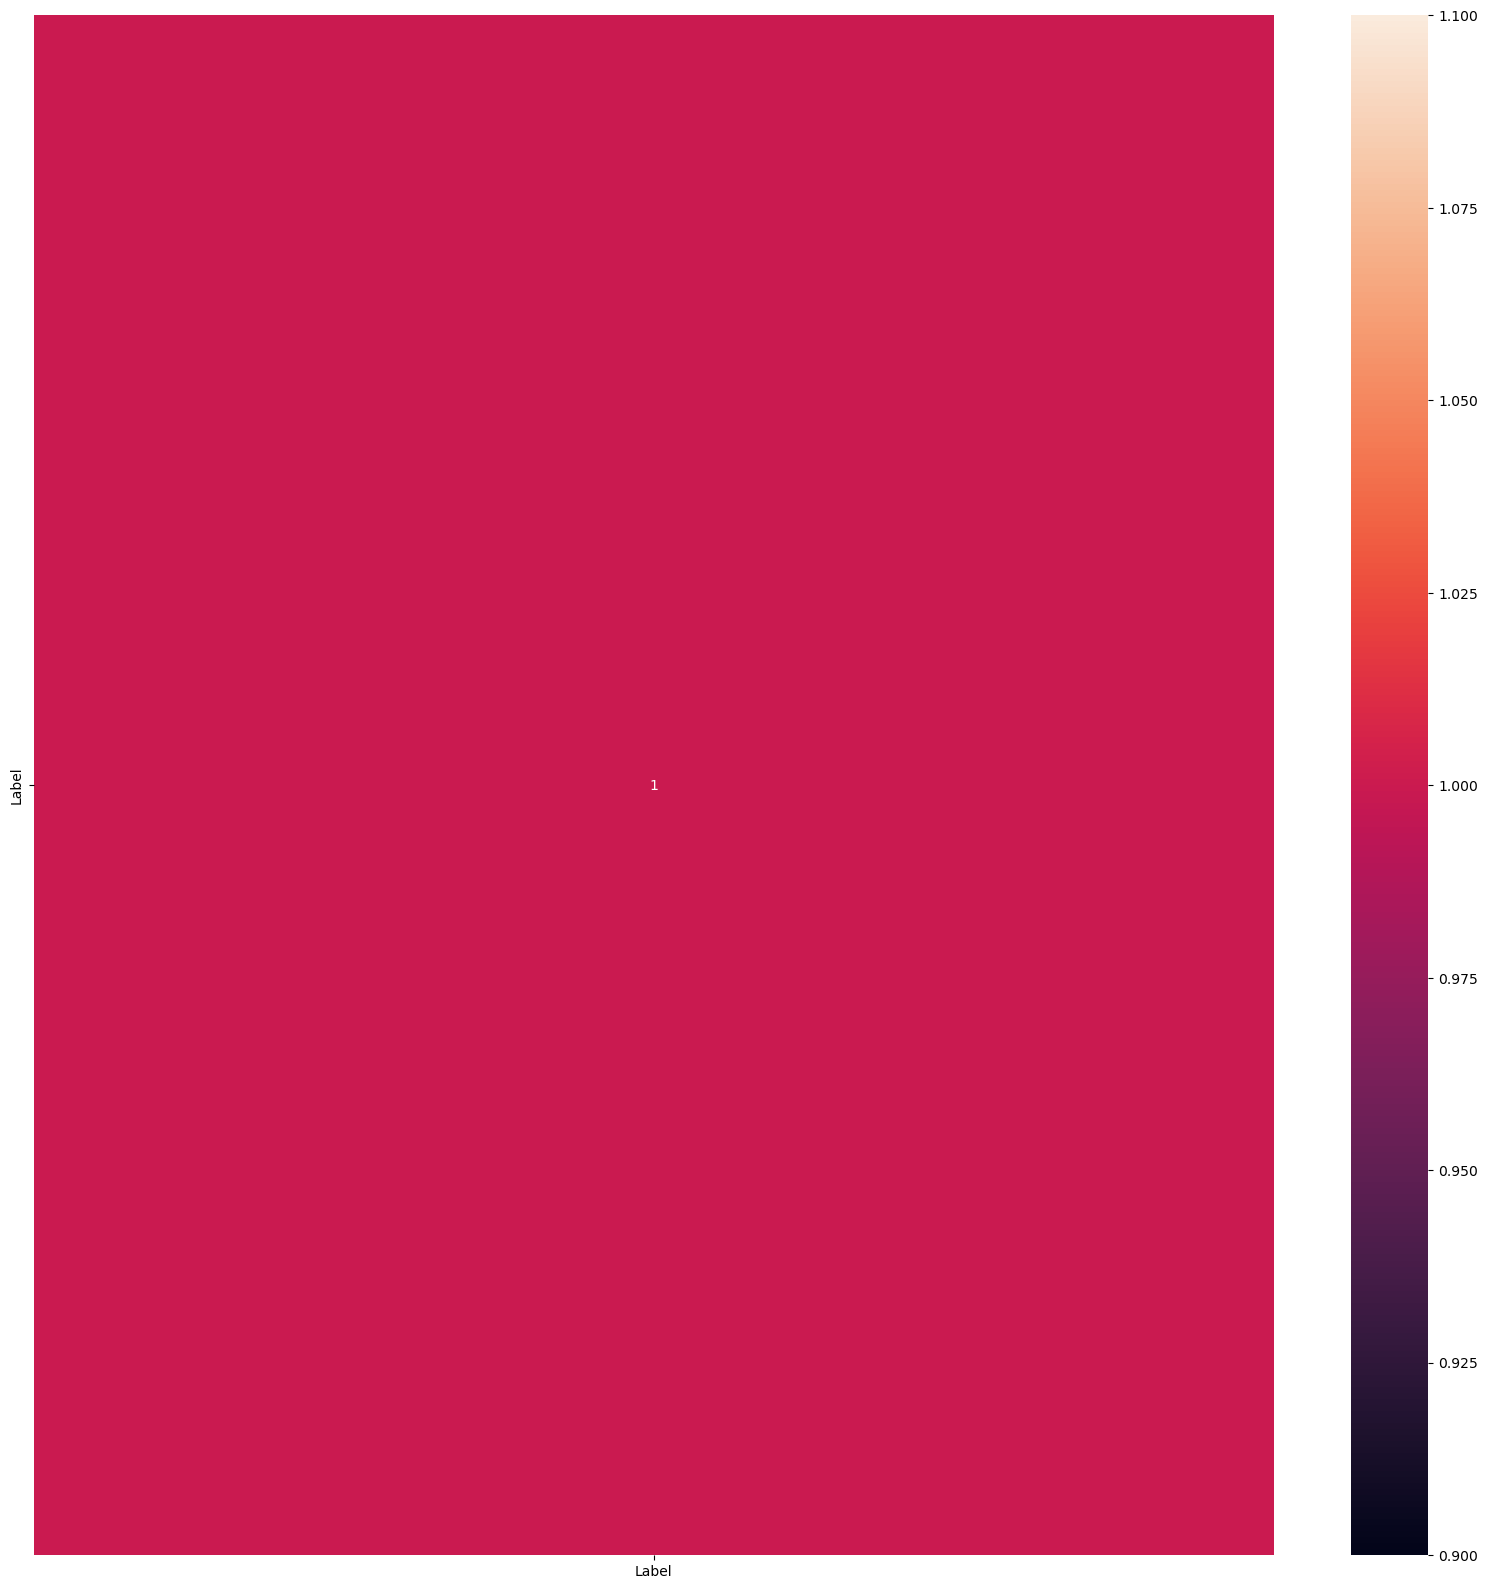

In [102]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(), annot=True)

<AxesSubplot:xlabel='Label', ylabel='count'>

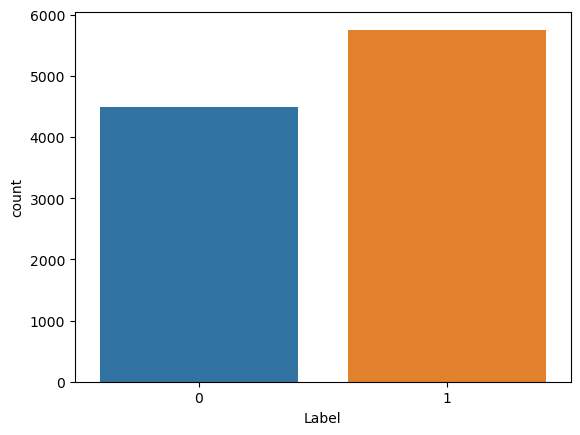

In [103]:
sns.countplot(x=dataset['Label'])

In [104]:
dataset.isnull().sum()

Statement    0
Label        0
dtype: int64

### Data preprocessing

In [105]:
def cleaning(msg):
    msg1=re.sub('[^A-Za-z0-9]',' ',msg)
    msg=msg1.lower()
    msg1=msg1.split()
    msg1=[i for i in msg1 if i not in sw]
    msg1=[ps.stem(i) for i in msg1]
    msg1=' '.join(msg1)
    return msg1

In [106]:
dataset['Statement']=dataset['Statement'].apply(cleaning)

In [107]:
dataset['Statement']

0        say anni list polit group support third trimes...
1        when declin coal start it start natur ga took ...
2        hillari clinton agre john mccain vote give geo...
3        health care reform legisl like mandat free sex...
4                     the econom turnaround start end term
                               ...                        
10235    there larger number shark attack florida case ...
10236        democrat becom parti atlanta metro area black
10237    say altern social secur oper galveston counti ...
10238          on lift u s cuban embargo allow travel cuba
10239    the depart veteran affair manual tell veteran ...
Name: Statement, Length: 10240, dtype: object

### Tfidf Vectorizer

In [108]:
tfidf.fit(dataset['Statement'])

TfidfVectorizer()

In [109]:
x=tfidf.transform(dataset['Statement'])
print(x)

  (0, 7677)	0.43836104606993825
  (0, 7503)	0.2767842857395208
  (0, 7271)	0.21194798355928404
  (0, 6542)	0.11657721567711764
  (0, 5783)	0.2930400485608947
  (0, 4553)	0.3263001128741299
  (0, 3501)	0.293820295505743
  (0, 2322)	0.34732939438485816
  (0, 856)	0.4578169364647548
  (0, 584)	0.25260483410894563
  (1, 8137)	0.1927962127602585
  (1, 7579)	0.19520808112961258
  (1, 7079)	0.6533310633821857
  (1, 5887)	0.14272195956594963
  (1, 5108)	0.26528395790508674
  (1, 4116)	0.1914204381723087
  (1, 3342)	0.21513797279343957
  (1, 3278)	0.21388519663497665
  (1, 2274)	0.2636934630189428
  (1, 1842)	0.26528395790508674
  (1, 1494)	0.18966147873751435
  (1, 1181)	0.2579326996448134
  (1, 656)	0.18987687408360532
  (2, 8004)	0.19195158890134262
  (2, 4779)	0.27304360933647137
  :	:
  (10237, 787)	0.29776382358381875
  (10238, 7646)	0.3846864028899552
  (10238, 5339)	0.254037750870313
  (10238, 4527)	0.40592571760683693
  (10238, 2724)	0.4517850422826616
  (10238, 2155)	0.434159753240072

In [110]:
y=dataset['Label']
y

0        0
1        1
2        1
3        0
4        1
        ..
10235    1
10236    1
10237    1
10238    0
10239    0
Name: Label, Length: 10240, dtype: int64

### Spliting Dataset

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report

In [112]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.25,random_state=2)

### LogisticRegression

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
lr=LogisticRegression()

In [115]:
lr.fit(x1_train,y1_train)

LogisticRegression()

In [116]:
y1_pred=lr.predict(x1_test)

print("accuracy of logisticRegression:",accuracy_score(y1_test,y1_pred))

### Navie_bayes

In [117]:
from sklearn.naive_bayes import MultinomialNB

In [118]:
naiveclassifer=MultinomialNB()
naiveclassifer.fit(x1_train,y1_train)

MultinomialNB()

In [119]:
y2_pred=naiveclassifer.predict(x1_test)
print(y2_pred)

[1 1 0 ... 1 0 1]


In [120]:
print("accurary score of MultinomialNB:",accuracy_score(y1_test,y2_pred))

accurary score of MultinomialNB: 0.604296875


### AdaBoostClassifier

In [121]:
from sklearn.ensemble import AdaBoostClassifier

In [122]:
abc=AdaBoostClassifier()

In [133]:
model=abc.fit(x1_train,y1_train)

In [124]:
y3_pred=abc.predict(x1_test)

In [128]:
print('accuracy score of adaboostclassifier:',accuracy_score(y1_test,y3_pred))

accuracy score of adaboostclassifier 0.599609375


In [130]:
confusion_matrix(y1_test,y3_pred)

array([[ 311,  800],
       [ 225, 1224]], dtype=int64)

In [131]:
classification_report(y1_test,y3_pred)

'              precision    recall  f1-score   support\n\n           0       0.58      0.28      0.38      1111\n           1       0.60      0.84      0.70      1449\n\n    accuracy                           0.60      2560\n   macro avg       0.59      0.56      0.54      2560\nweighted avg       0.59      0.60      0.56      2560\n'

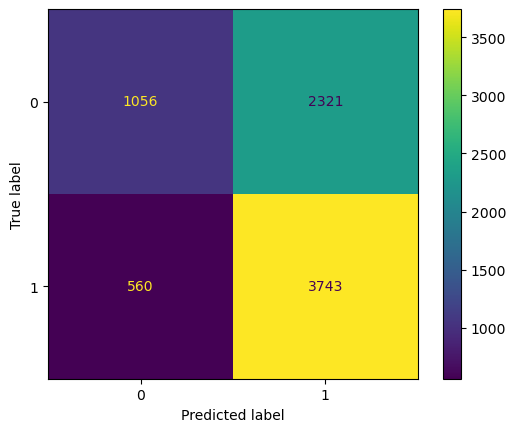

In [135]:
plot_confusion_matrix(model,x1_train,y1_train)